In [22]:
#Import modules
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully.")

Libraries imported successfully.


In [23]:
#Upload file
from google.colab import files
import io

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
  df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (6).csv
User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn (6).csv" with length 977501 bytes


In [24]:
#Verify file is uploaded
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Documentation of Columns:
#0 = FALSE, 1 = TRUE for numeric answers
#customerID: Customer ID. (Not important)
#gender: Whether the customer is a male or a female. (Male, Female)
#SeniorCitizen: Whether the customer is a senior citizen or not
#Partner: Whether the customer has a partner or not
#Dependents: Whether the customer has dependents or not
#tenure: Number of months the customer has stayed with the company
#PhoneService: Whether the customer has a phone service or not
#MultipleLines: Whether the customer has multiple lines
#InternetService: Customer's internet service infrastructure (DSL, Fiber Optic) (No = Customer has no internet service)
#OnlineSecurity: Whether the customer has online security or not
#OnlineBackup: Whether the customer has online backup or not
#DeviceProtection: Whether the customer has device protection or not
#Whether the customer has tech support or not
#StreamingTV: Whether the customer has streaming TV or not
#StreamingMovies: Whether the customer has streaming movies or not
#Contract: The contract term of the customer (Month-to-month, One year, Two year)
#PaperlessBilling: Whether the customer has paperless billing or not
#PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card) (Bank transfer and Credit card are automatic payments)
#MonthlyCharges: The amount charged to the customer monthly.
#TotalCharges: Total amount billed to the customer.
#Churn: Variable the model should attempt to predict: Whether the customer churned or not.

In [26]:
#Segment data by InternetService
Data_Internet_NONE = df[df['InternetService'] == 'No'].copy()
Data_Internet_DSL = df[df['InternetService'] == 'DSL'].copy()
Data_Internet_FIBER = df[df['InternetService'] == 'Fiber optic'].copy()

print(f"Number of customers with no internet service: {len(Data_Internet_NONE)}")
print(f"Number of customers with DSL internet service: {len(Data_Internet_DSL)}")
print(f"Number of customers with Fiber optic internet service: {len(Data_Internet_FIBER)}")

Number of customers with no internet service: 1526
Number of customers with DSL internet service: 2421
Number of customers with Fiber optic internet service: 3096


In [27]:
#Print basic statistics
dataframes = {
    "Data_Internet_NONE": Data_Internet_NONE,
    "Data_Internet_DSL": Data_Internet_DSL,
    "Data_Internet_FIBER": Data_Internet_FIBER
}

for name, df_segment in dataframes.items():
    total_customers = len(df_segment)
    churned_customers = df_segment[df_segment['Churn'] == 'Yes']
    num_churned = len(churned_customers)
    percentage_churned = (num_churned / total_customers) * 100 if total_customers > 0 else 0

    print(f"--- {name} ---")
    print(f"Total customers: {total_customers}")
    print(f"Number of churning customers: {num_churned}")
    print(f"Percentage of churning customers: {percentage_churned:.2f}%\n")


--- Data_Internet_NONE ---
Total customers: 1526
Number of churning customers: 113
Percentage of churning customers: 7.40%

--- Data_Internet_DSL ---
Total customers: 2421
Number of churning customers: 459
Percentage of churning customers: 18.96%

--- Data_Internet_FIBER ---
Total customers: 3096
Number of churning customers: 1297
Percentage of churning customers: 41.89%



In [28]:
#Assemble dataframe of statistics
basic_stats_list = []

for name, df_segment in dataframes.items():
    total_customers = len(df_segment)
    churned_customers = df_segment[df_segment['Churn'] == 'Yes']
    num_churned = len(churned_customers)
    percentage_churned = (num_churned / total_customers) * 100 if total_customers > 0 else 0

    total_monthly_charges_no_churn = df_segment[df_segment['Churn'] == 'No']['MonthlyCharges'].sum()
    total_monthly_charges_yes_churn = df_segment[df_segment['Churn'] == 'Yes']['MonthlyCharges'].sum()
    total_monthly_charges = total_monthly_charges_no_churn + total_monthly_charges_yes_churn
    percentage_charges_lost = (total_monthly_charges_yes_churn / total_monthly_charges) * 100 if total_monthly_charges > 0 else 0

    basic_stats_list.append({
        'Segment': name,
        'Total Customers': total_customers,
        'Number Churned Customers': num_churned,
        'Percentage Churned Customers': percentage_churned,
        'Monthly Charges Retained': total_monthly_charges_no_churn,
        'Monthly Charges Lost': total_monthly_charges_yes_churn,
        'Percentage Charges Lost': percentage_charges_lost
    })

basic_stats = pd.DataFrame(basic_stats_list)
basic_stats['Segment'] = basic_stats['Segment'].replace({
    'Data_Internet_NONE': 'No Internet',
    'Data_Internet_DSL': 'DSL',
    'Data_Internet_FIBER': 'Fiber Optic'
})
print("Basic statistics captured in 'basic_stats' DataFrame:")
display(basic_stats)

Basic statistics captured in 'basic_stats' DataFrame:


,Segment,Total Customers,Number Churned Customers,Percentage Churned Customers,Monthly Charges Retained,Monthly Charges Lost,Percentage Charges Lost
0,No Internet,1526,113,7.404980,29865.25,2301.60,7.155192
1,DSL,2421,459,18.959108,118136.15,22529.20,16.016169
2,Fiber Optic,3096,1297,41.892765,168984.35,114300.05,40.348162


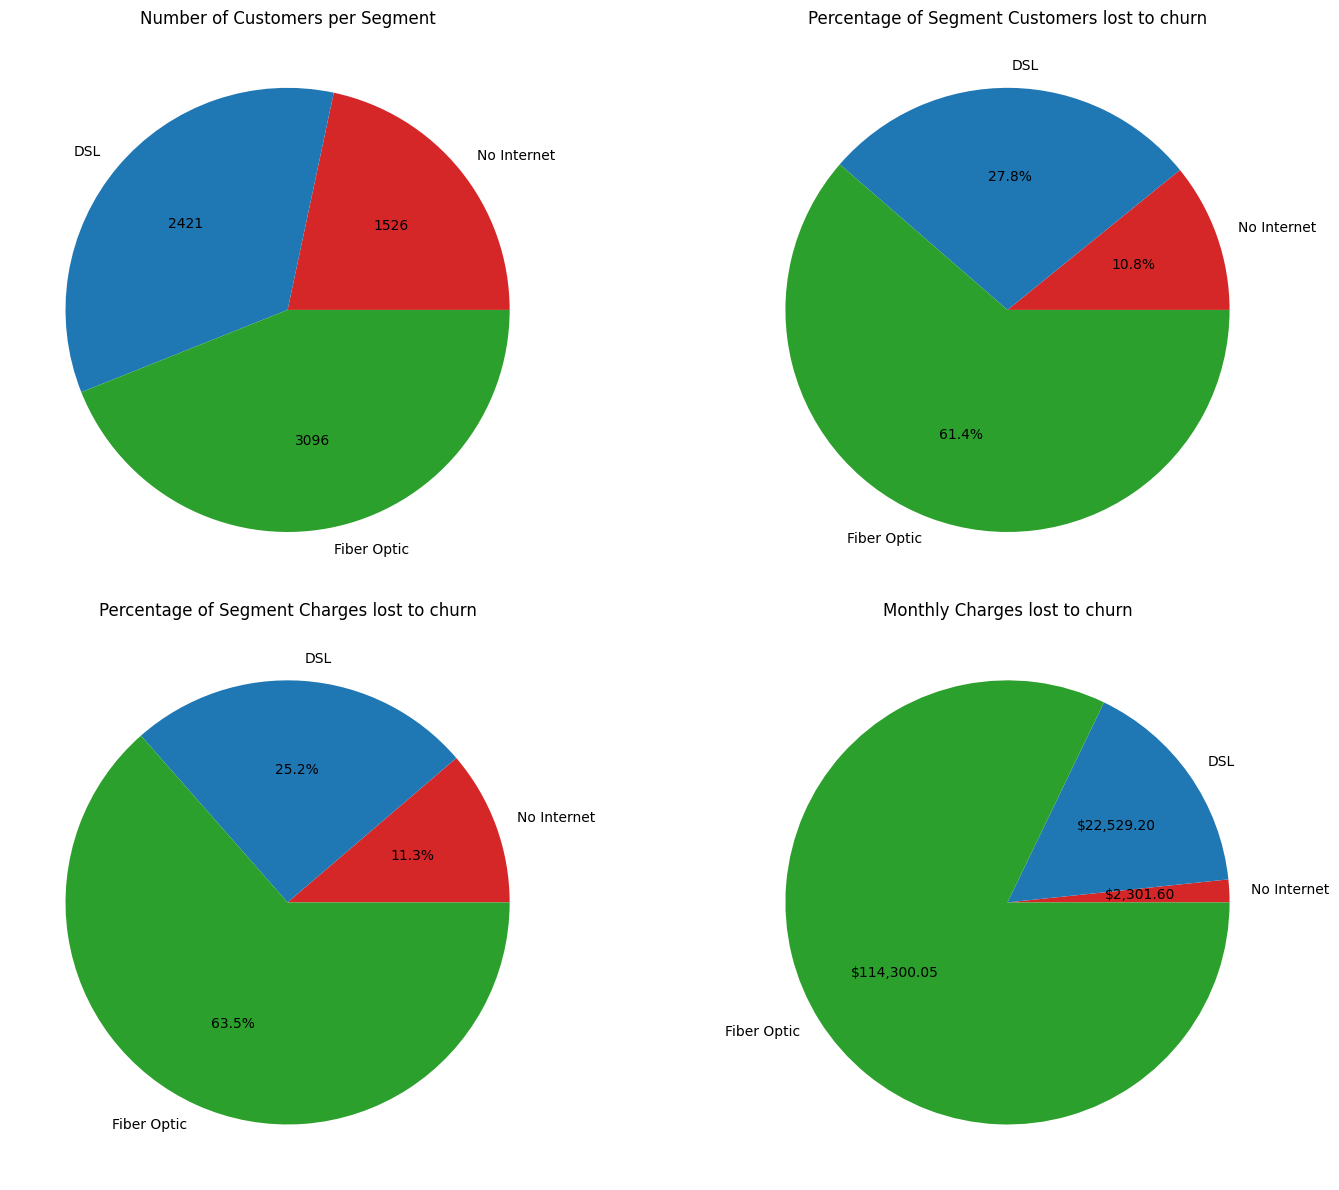

In [29]:
#Create basic visualization of statistical data
colors = ['tab:red', 'tab:blue', 'tab:green']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Pie chart 1: Number of Customers per Segment
axes[0].pie(basic_stats['Total Customers'], labels=basic_stats['Segment'], colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(basic_stats['Total Customers']) / 100))
axes[0].set_title('Number of Customers per Segment')

# Pie chart 2: Percentage of Segment Customers lost to churn
axes[1].pie(basic_stats['Percentage Churned Customers'], labels=basic_stats['Segment'], colors=colors, autopct='%1.1f%%')
axes[1].set_title('Percentage of Segment Customers lost to churn')

# Pie chart 3: Percentage of Segment Charges lost to churn
axes[2].pie(basic_stats['Percentage Charges Lost'], labels=basic_stats['Segment'], colors=colors, autopct='%1.1f%%')
axes[2].set_title('Percentage of Segment Charges lost to churn')

# Pie chart 4: Monthly Charges lost to churn
axes[3].pie(basic_stats['Monthly Charges Lost'], labels=basic_stats['Segment'], colors=colors, autopct=lambda p: '${:,.2f}'.format(p * sum(basic_stats['Monthly Charges Lost']) / 100))
axes[3].set_title('Monthly Charges lost to churn')

plt.tight_layout()
plt.show()

In [33]:
# Calculate monthly charges for churned customers
NONE_Lost = Data_Internet_NONE[Data_Internet_NONE['Churn'] == 'Yes']['MonthlyCharges'].to_frame()
DSL_Lost = Data_Internet_DSL[Data_Internet_DSL['Churn'] == 'Yes']['MonthlyCharges'].to_frame()
FIBER_Lost = Data_Internet_FIBER[Data_Internet_FIBER['Churn'] == 'Yes']['MonthlyCharges'].to_frame()

# Calculate monthly charges for kept customers
NONE_Kept = Data_Internet_NONE[Data_Internet_NONE['Churn'] == 'No']['MonthlyCharges'].to_frame()
DSL_Kept = Data_Internet_DSL[Data_Internet_DSL['Churn'] == 'No']['MonthlyCharges'].to_frame()
FIBER_Kept = Data_Internet_FIBER[Data_Internet_FIBER['Churn'] == 'No']['MonthlyCharges'].to_frame()

print("Created DataFrames for monthly charges of churned and kept customers:")
print(f"  - NONE_Lost: {len(NONE_Lost)} entries")
print(f"  - DSL_Lost: {len(DSL_Lost)} entries")
print(f"  - FIBER_Lost: {len(FIBER_Lost)} entries")
print(f"  - NONE_Kept: {len(NONE_Kept)} entries")
print(f"  - DSL_Kept: {len(DSL_Kept)} entries")
print(f"  - FIBER_Kept: {len(FIBER_Kept)} entries")

Created DataFrames for monthly charges of churned and kept customers:
  - NONE_Lost: 113 entries
  - DSL_Lost: 459 entries
  - FIBER_Lost: 1297 entries
  - NONE_Kept: 1413 entries
  - DSL_Kept: 1962 entries
  - FIBER_Kept: 1799 entries
      MonthlyCharges
22             20.15
97             21.05
268            19.35
385            19.95
408            19.90
...              ...
6558           20.25
6609           20.10
6789           20.20
6792           24.90
6969           20.50

[113 rows x 1 columns]


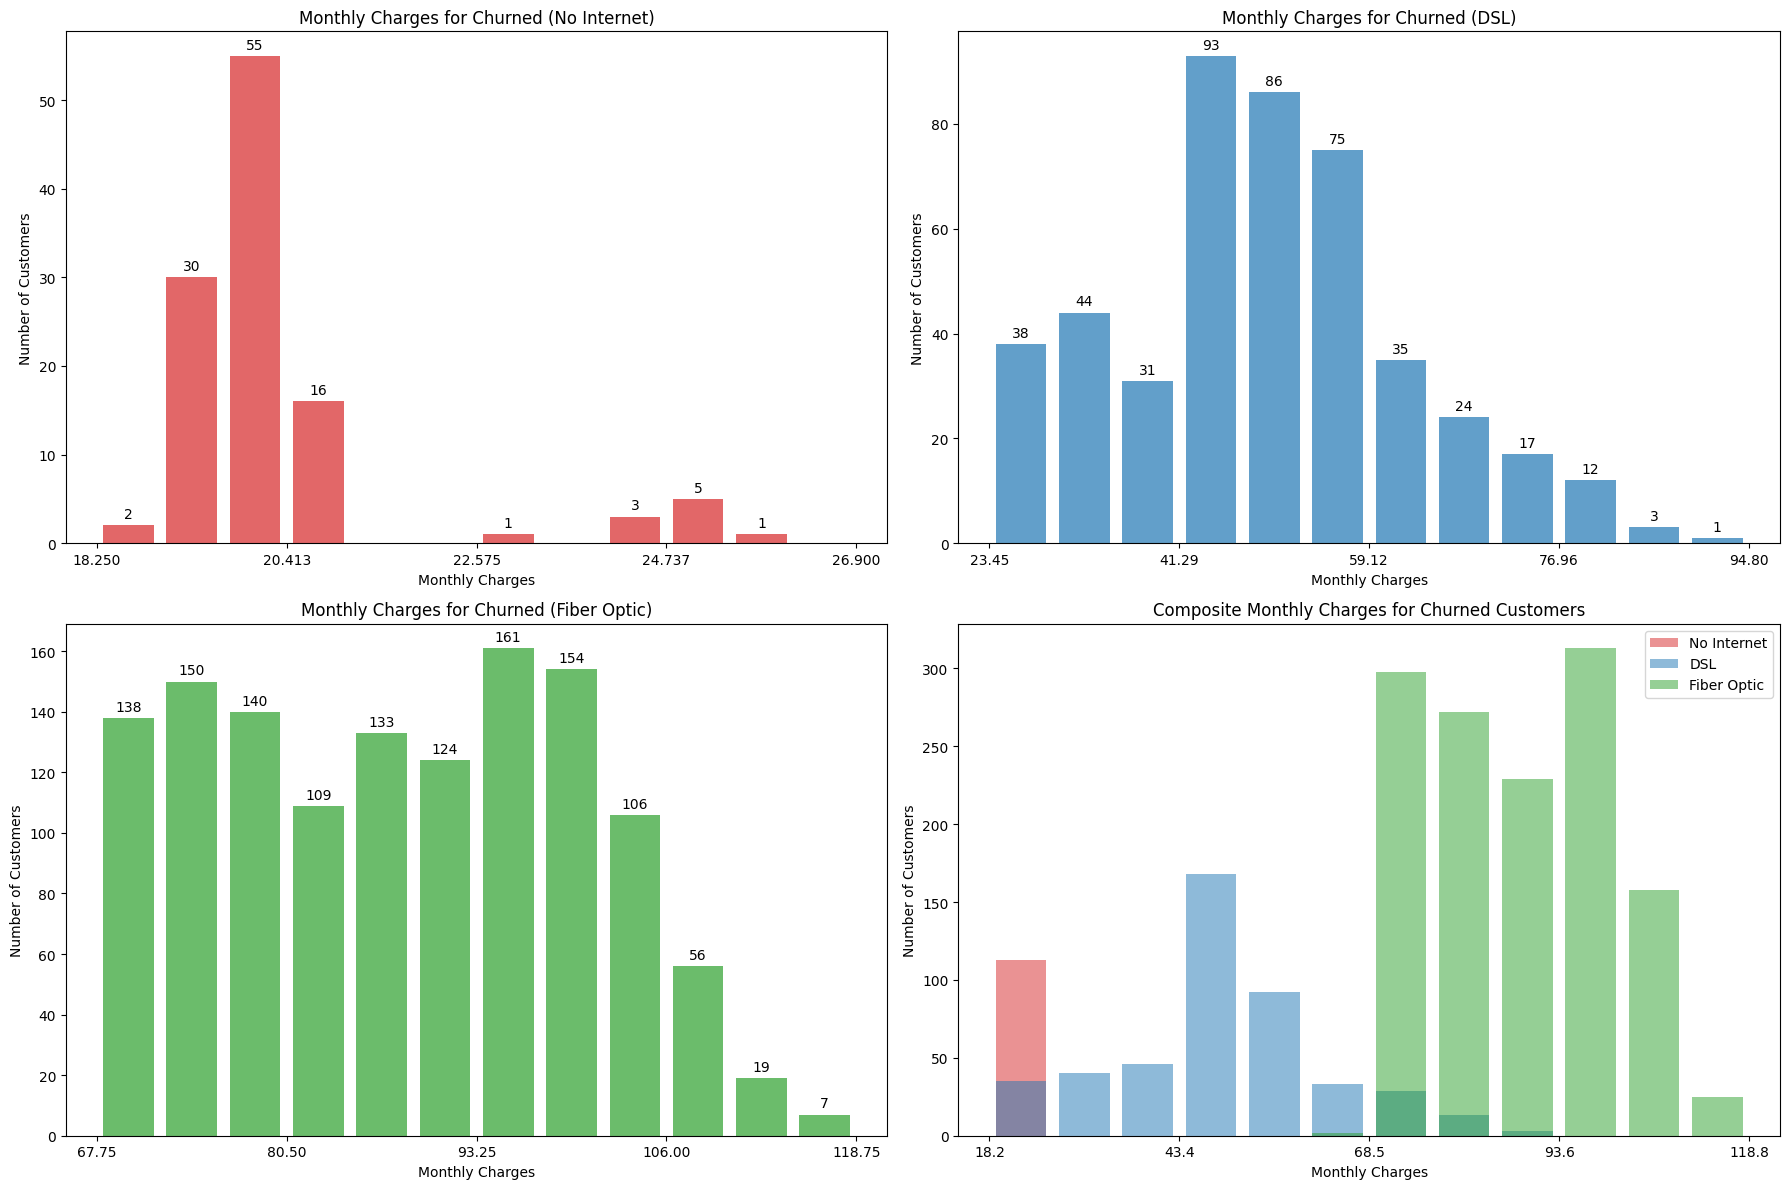

In [39]:
#Develop histograms showing per-segment churn count, grouped by relative cost
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Helper function to add data labels to histograms
def add_labels_to_hist(ax, patches, title, bins_to_use):
    for patch in patches:
        height = patch.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel('Monthly Charges')
    ax.set_ylabel('Number of Customers')
    # Use fewer x-ticks for better readability based on the specific bins
    ax.set_xticks(np.linspace(bins_to_use.min(), bins_to_use.max(), 5))

# Histogram 1: No Internet (Churned)
bins_none = np.linspace(18.25, 26.9, 13) # 12 buckets
counts0, bins0, patches0 = axes[0].hist(NONE_Lost['MonthlyCharges'], bins=bins_none, color='tab:red', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[0], patches0, 'Monthly Charges for Churned (No Internet)', bins_none)

# Histogram 2: DSL (Churned)
bins_dsl = np.linspace(23.45, 94.8, 13) # 12 buckets
counts1, bins1, patches1 = axes[1].hist(DSL_Lost['MonthlyCharges'], bins=bins_dsl, color='tab:blue', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[1], patches1, 'Monthly Charges for Churned (DSL)', bins_dsl)

# Histogram 3: Fiber Optic (Churned)
bins_fiber = np.linspace(67.75, 118.75, 13) # 12 buckets
counts2, bins2, patches2 = axes[2].hist(FIBER_Lost['MonthlyCharges'], bins=bins_fiber, color='tab:green', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[2], patches2, 'Monthly Charges for Churned (Fiber Optic)', bins_fiber)

# Histogram 4: Composite of all three (Churned)
bins_composite = np.linspace(18.25, 118.75, 13) # 12 buckets
axes[3].hist(NONE_Lost['MonthlyCharges'], bins=bins_composite, color='tab:red', alpha=0.5, label='No Internet', rwidth=0.8)
axes[3].hist(DSL_Lost['MonthlyCharges'], bins=bins_composite, color='tab:blue', alpha=0.5, label='DSL', rwidth=0.8)
axes[3].hist(FIBER_Lost['MonthlyCharges'], bins=bins_composite, color='tab:green', alpha=0.5, label='Fiber Optic', rwidth=0.8)
axes[3].set_title('Composite Monthly Charges for Churned Customers')
axes[3].set_xlabel('Monthly Charges')
axes[3].set_ylabel('Number of Customers')
axes[3].set_xticks(np.linspace(bins_composite.min(), bins_composite.max(), 5))
axes[3].legend()

plt.tight_layout()
plt.show()

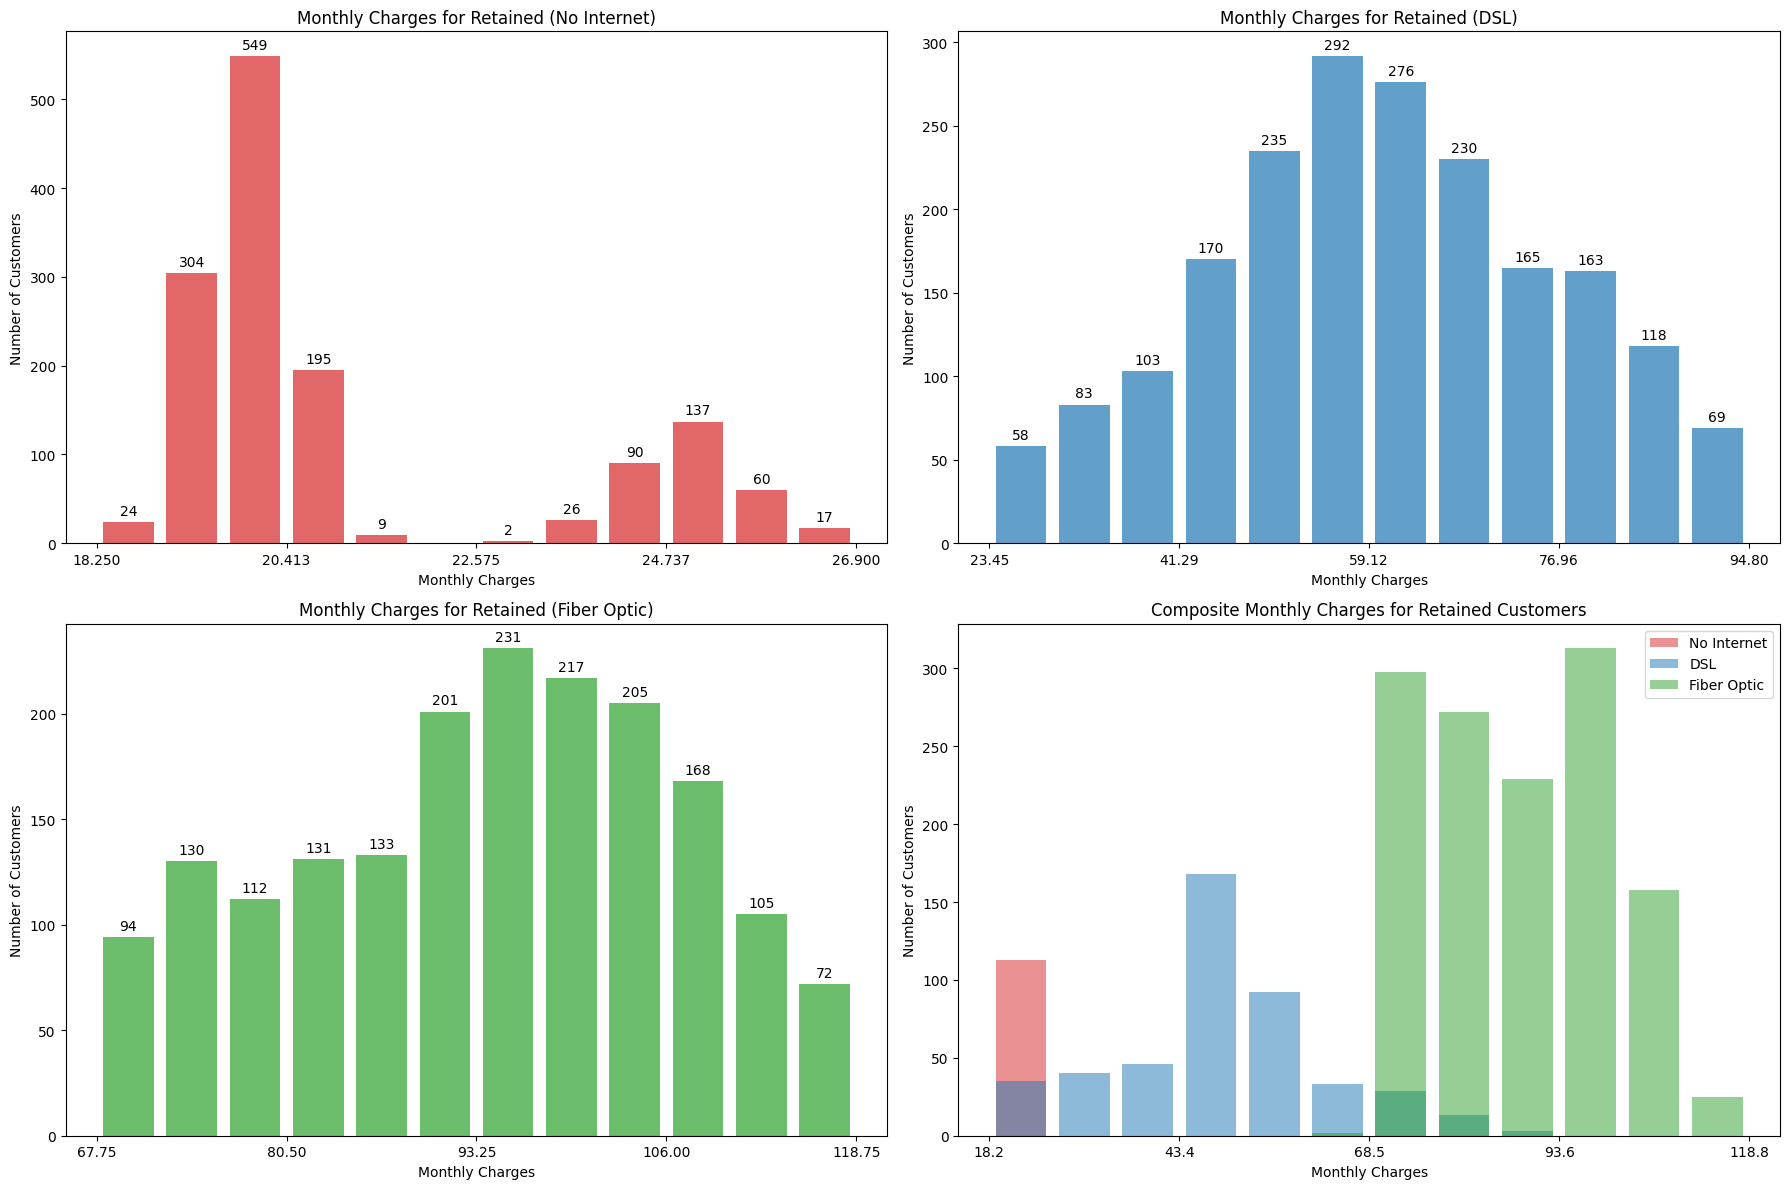

In [41]:
#Develop histograms showing per-segment retention count, grouped by relative cost
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Helper function to add data labels to histograms
def add_labels_to_hist(ax, patches, title, bins_to_use):
    for patch in patches:
        height = patch.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel('Monthly Charges')
    ax.set_ylabel('Number of Customers')
    # Use fewer x-ticks for better readability based on the specific bins
    ax.set_xticks(np.linspace(bins_to_use.min(), bins_to_use.max(), 5))

# Histogram 1: No Internet (Churned)
bins_none = np.linspace(18.25, 26.9, 13) # 12 buckets
counts0, bins0, patches0 = axes[0].hist(NONE_Kept['MonthlyCharges'], bins=bins_none, color='tab:red', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[0], patches0, 'Monthly Charges for Retained (No Internet)', bins_none)

# Histogram 2: DSL (Churned)
bins_dsl = np.linspace(23.45, 94.8, 13) # 12 buckets
counts1, bins1, patches1 = axes[1].hist(DSL_Kept['MonthlyCharges'], bins=bins_dsl, color='tab:blue', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[1], patches1, 'Monthly Charges for Retained (DSL)', bins_dsl)

# Histogram 3: Fiber Optic (Churned)
bins_fiber = np.linspace(67.75, 118.75, 13) # 12 buckets
counts2, bins2, patches2 = axes[2].hist(FIBER_Kept['MonthlyCharges'], bins=bins_fiber, color='tab:green', alpha=0.7, rwidth=0.8)
add_labels_to_hist(axes[2], patches2, 'Monthly Charges for Retained (Fiber Optic)', bins_fiber)

# Histogram 4: Composite of all three (Churned)
bins_composite = np.linspace(18.25, 118.75, 13) # 12 buckets
axes[3].hist(NONE_Lost['MonthlyCharges'], bins=bins_composite, color='tab:red', alpha=0.5, label='No Internet', rwidth=0.8)
axes[3].hist(DSL_Lost['MonthlyCharges'], bins=bins_composite, color='tab:blue', alpha=0.5, label='DSL', rwidth=0.8)
axes[3].hist(FIBER_Lost['MonthlyCharges'], bins=bins_composite, color='tab:green', alpha=0.5, label='Fiber Optic', rwidth=0.8)
axes[3].set_title('Composite Monthly Charges for Retained Customers')
axes[3].set_xlabel('Monthly Charges')
axes[3].set_ylabel('Number of Customers')
axes[3].set_xticks(np.linspace(bins_composite.min(), bins_composite.max(), 5))
axes[3].legend()

plt.tight_layout()
plt.show()

In [42]:
#Observed values.
Churned_NONE = [2,30,55,16,0,0,1,0,3,5,1,0]
Churned_DSL = [38,44,31,93,86,75,35,24,17,12,3,1]
Churned_FiberOptic = [138,150,140,109,133,124,161,154,108,56,19,7]
Retained_NONE = [24,304,549,195,9,0,2,26,90,137,60,17]
Retained_DSL = [58,83,103,170,235,292,276,230,165,163,118,69]
Retained_FiberOptic = [94,130,112,131,133,201,231,217,205,168,105,72]

In [47]:
#Create dataframes for churn proportion per histogram bucket
Churn_Proportion_NONE = []
for i in range(len(Churned_NONE)):
    total_in_bin = Churned_NONE[i] + Retained_NONE[i]
    if total_in_bin > 0:
        Churn_Proportion_NONE.append(Churned_NONE[i] / total_in_bin)
    else:
        Churn_Proportion_NONE.append(0)

Churn_Proportion_DSL = []
for i in range(len(Churned_DSL)):
    total_in_bin = Churned_DSL[i] + Retained_DSL[i]
    if total_in_bin > 0:
        Churn_Proportion_DSL.append(Churned_DSL[i] / total_in_bin)
    else:
        Churn_Proportion_DSL.append(0)

Churn_Proportion_FiberOptic = []
for i in range(len(Churned_FiberOptic)):
    total_in_bin = Churned_FiberOptic[i] + Retained_FiberOptic[i]
    if total_in_bin > 0:
        Churn_Proportion_FiberOptic.append(Churned_FiberOptic[i] / total_in_bin)
    else:
        Churn_Proportion_FiberOptic.append(0)

print("Churn Proportion for 'No Internet' segment (NONE_Lost vs NONE_Kept):")
print(Churn_Proportion_NONE)
print(Churn_Proportion_DSL)
print(Churn_Proportion_FiberOptic)

Churn Proportion for 'No Internet' segment (NONE_Lost vs NONE_Kept):
[0.07692307692307693, 0.08982035928143713, 0.09105960264900662, 0.07582938388625593, 0.0, 0, 0.3333333333333333, 0.0, 0.03225806451612903, 0.035211267605633804, 0.01639344262295082, 0.0]
[0.3958333333333333, 0.3464566929133858, 0.23134328358208955, 0.35361216730038025, 0.26791277258566976, 0.20435967302452315, 0.11254019292604502, 0.09448818897637795, 0.09340659340659341, 0.06857142857142857, 0.024793388429752067, 0.014285714285714285]
[0.5948275862068966, 0.5357142857142857, 0.5555555555555556, 0.45416666666666666, 0.5, 0.38153846153846155, 0.4107142857142857, 0.41509433962264153, 0.3450479233226837, 0.25, 0.1532258064516129, 0.08860759493670886]


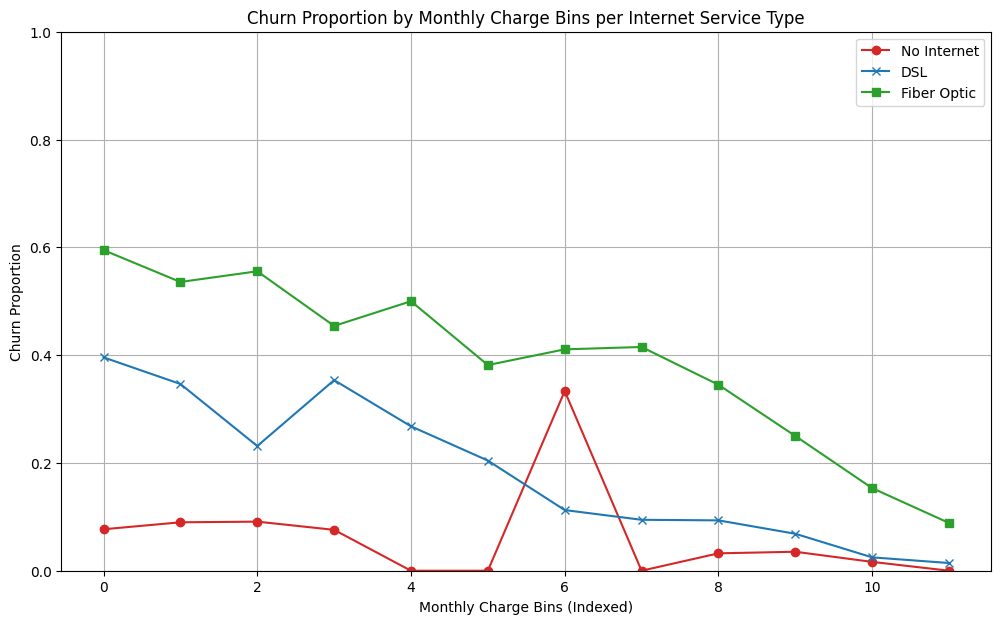

In [49]:
#Plot churn proportion by montly charge bin
plt.figure(figsize=(12, 7))

# Plot Churn_Proportion_NONE
plt.plot(Churn_Proportion_NONE, label='No Internet', color='tab:red', marker='o')

# Plot Churn_Proportion_DSL
plt.plot(Churn_Proportion_DSL, label='DSL', color='tab:blue', marker='x')

# Plot Churn_Proportion_FiberOptic
plt.plot(Churn_Proportion_FiberOptic, label='Fiber Optic', color='tab:green', marker='s')

plt.title('Churn Proportion by Monthly Charge Bins per Internet Service Type')
plt.xlabel('Monthly Charge Bins (Indexed)')
plt.ylabel('Churn Proportion')
plt.ylim(0, 1) # Set Y-axis min and max to 0 and 1
plt.grid(True)
plt.legend()
plt.show()